In [2]:
#Predicting Churn in the telecom Industry
# Importing necessary libraries in Python

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
#Importing the file using Pandas Dataframe

df=pd.read_csv('C:/Users/RAN/Downloads/churn.csv')

In [4]:
#Visualising the top 5 rows of the csv file

df.head()


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
#Determining the feature of the dataset

df.shape

(3333, 21)

In [6]:
#Check for null values

df.isna().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [7]:
#Renaming the headers to a proper format

df=df.rename(columns={"Churn?":"Churn"})
df=df.rename(columns={"Int'l Plan":'International Plan'})

In [8]:
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
#label encoding for the categorical variables

df['Churn']=df['Churn'].apply(lambda x:1 if x=="True." else 0 )
df['International Plan']=df['International Plan'].apply(lambda x:1 if x=="yes" else 0)
df['VMail Plan']=df['VMail Plan'].apply(lambda x:1 if x=="yes" else 0 )

In [10]:
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Text(0.5, 1.0, 'Correlation Matrix to facilitate feature selection')

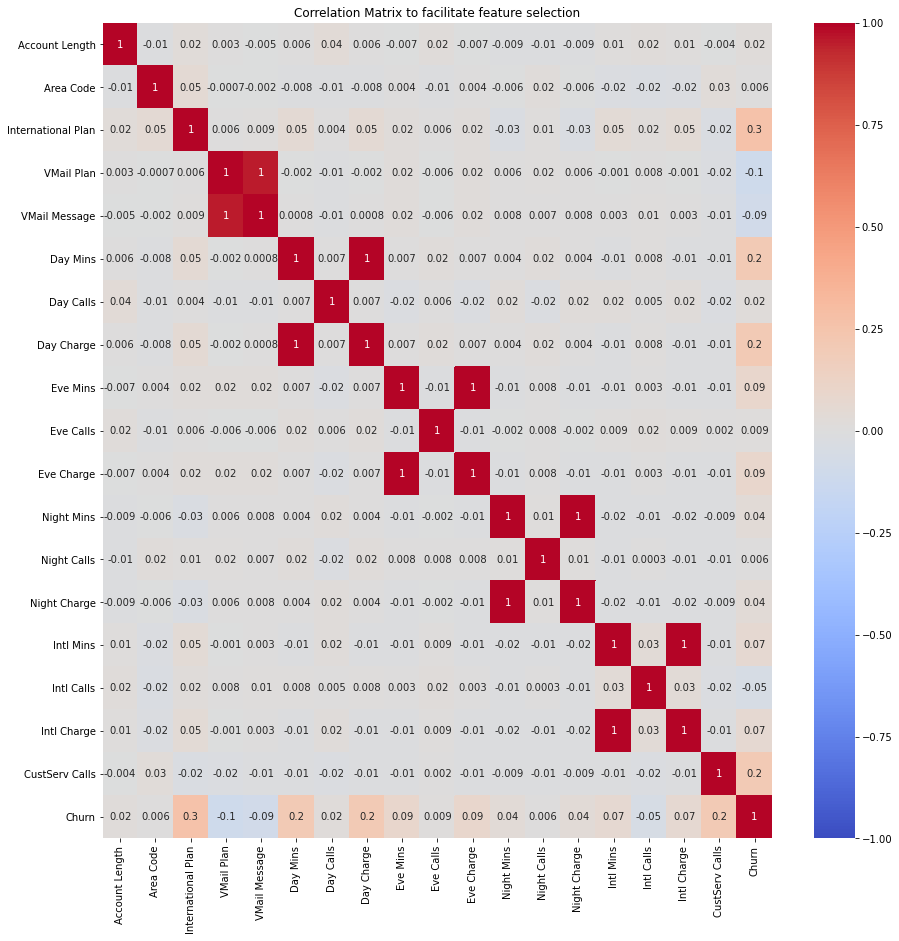

In [11]:
#Visualising the correlation matrix in figuring out the relationship between the variables

correlation_mat = df.corr()
ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation_mat,annot = True, fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm')
plt.title("Correlation Matrix to facilitate feature selection")

In [12]:
df.columns


Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

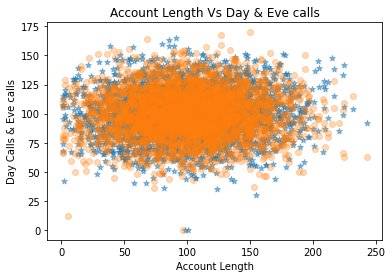

In [13]:
#1 A scatter plot to visualise the distribution of Day &  Eve calls over the Account length

x=df['Account Length']
y=df['Day Calls']
z=df['Eve Calls']
a=df['Intl Calls']
plt.scatter(x, y,vmin=60,vmax=180,marker='*',alpha=0.5)
plt.scatter(x, z,vmin=60,vmax=180,marker='o',c='#ff7f0e',alpha=0.3)
#plt.scatter(x, a,marker='o',c=,alpha=0.5)
plt.xlabel('Account Length')
plt.ylabel('Day Calls & Eve calls')
plt.title('Account Length Vs Day & Eve calls')
plt.show()


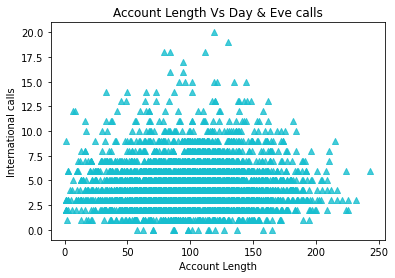

In [14]:
#2 A scatter plot to visualise the distribution of International calls over the Account length

x=df['Account Length']
a=df['Intl Calls']
plt.scatter(x, a,marker='^',c='#17becf',alpha=0.8)
plt.xlabel('Account Length')
plt.ylabel('International calls')
plt.title('Account Length Vs Day & Eve calls')
plt.show()

([<matplotlib.patches.Wedge at 0x18066f0dcd0>,
 [Text(-1.0994418836523334, 0.03503633072981899, 'Day Calls'),
  Text(1.0944502505718576, -0.11035691651726284, 'Eve Calls'),
  Text(0.07544130149888036, 1.097409955316679, 'Intl Calls')],
 [Text(-0.5996955729012726, 0.019110725852628536, '49.0%'),
  Text(0.596972863948286, -0.060194681736688814, '48.8%'),
  Text(0.041149800817571094, 0.598587248354552, '2.2%')])

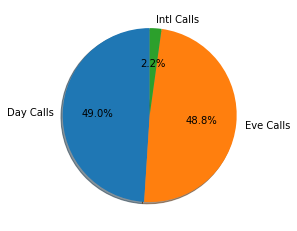

In [15]:
#3 A pie chart to visualise the overall distribution of Day,eve &International calls

x=df['Day Calls'].mean()
y=df['Eve Calls'].mean()
z=df['Intl Calls'].mean()
labels = 'Day Calls', 'Eve Calls', 'Intl Calls'
sizes = [x,y,z]
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)


([<matplotlib.patches.Wedge at 0x18066f63eb0>,
 [Text(-1.0392645276078827, -0.3604569900223393, 'Day Charge'),
  Text(1.0856742250763403, 0.17695049309026645, 'Eve Charge'),
  Text(0.18858226609492393, 1.0837143207111843, 'Intl Charge')],
 [Text(-0.5668715605133905, -0.19661290364854866, '60.6%'),
  Text(0.592185940950731, 0.09651845077650896, '33.9%'),
  Text(0.10286305423359486, 0.5911169022061005, '5.5%')])

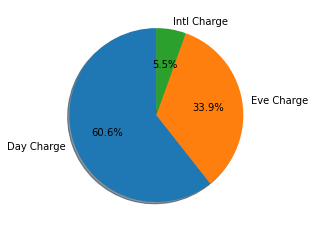

In [16]:
#Avg.Cost calulation of Day,Eve & Intl calls

x=df['Day Charge'].mean()
y=df['Eve Charge'].mean()
z=df['Intl Charge'].mean()
labels = 'Day Charge', 'Eve Charge', 'Intl Charge'
sizes = [x,y,z]
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

In [17]:
#Feature selection  

df_new=df.drop(['State','Area Code','Phone'],axis=1)
df_new.columns

Index(['Account Length', 'International Plan', 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [18]:
#Selecting the Dependent & Independent variable

X=df_new.drop(columns=['Churn'])
Y=df_new[['Churn']]

In [23]:
# Model building

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

#Splitting the dataset into train and test data 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

# Using a Decision tree classifier to train the model

model=DecisionTreeClassifier(criterion='entropy',max_depth=1)

#Fitting the model into training dataset
model.fit(X_train,Y_train)

#Predicting the test data using the fitted model
d_pred=model.predict(X_test)

#Predicting the accuracy score for the test data
predictions=metrics.accuracy_score(Y_test,d_pred)
print("The accuracy of the prediction using only Decision tree Classifier is ",predictions*100,'%')

#Improving accuracy using Adaboost Classifier

AdaBoost=AdaBoostClassifier(n_estimators = 400,learning_rate =1)
boostmodel=AdaBoost.fit(X_train,Y_train.values.ravel())
y_pred=boostmodel.predict(X_test)
predictions=metrics.accuracy_score(Y_test,y_pred)
print("The accuracy of the prediction after using Adaboost is ",predictions*100,'%')

#Improving accuracy using Gradient Boosting Classifier
Gradboost=GradientBoostingClassifier(loss='deviance',n_estimators=5000,learning_rate=0.05)
Gbmodel=Gradboost.fit(X_train,Y_train.values.ravel())
y_pred1=Gbmodel.predict(X_test)
predictions=metrics.accuracy_score(Y_test,y_pred1)

print("The accuracy of the prediction after using Gradient Boosting is ",predictions*100,'%')

The accuracy of the prediction using only Decision tree Classifier is  86.1 %
The accuracy of the prediction after using Adaboost is  86.4 %
The accuracy of the prediction after using Gradient Boosting is  94.39999999999999 %
